In [1]:
import uproot, ROOT, glob, os, random
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from sklearn.metrics import roc_curve, roc_auc_score, auc
from joblib import dump, load
from tqdm import tqdm
import pandas as pd
from xgboost import XGBClassifier
from array import array
import ctypes
import h5py
import mplhep as hep


Welcome to JupyROOT 6.30/04


In [ ]:
# def getXS(dsid):
#     xs_file = "/cvmfs/atlas.cern.ch/repo/sw/database/GroupData/dev/PMGTools/PMGxsecDB_mc16.txt"
#     try:
#         with open(xs_file, "r") as f:
#             for line in f:
#                 columns = line.split()
#                 if columns[0] == str(dsid):
#                     return float(columns[2])*float(columns[3])*float(columns[4])
#         print( "Couldn't find cross section for dsid", dsid, "so setting to 1.")
#     except IOError:
#         print("Cross section file not accessible on cvmfs.", dsid, " XS setting to 1.")
#     return 1

# def flattened_pt_weighted(data, bins, weight):
#     weights = np.zeros(len(data))
#     pt_hist, bin_edges = np.histogram(data, bins=bins, weights=weight)
#     for i in range(len(pt_hist)):
#         if pt_hist[i] == 0:
#             weights = np.where((data >= bin_edges[i]) & (data < bin_edges[i+1]), 1, weights)
#         else:
#             weights = np.where((data >= bin_edges[i]) & (data < bin_edges[i+1]), 1/pt_hist[i], weights)

#     return weights

# path = '/global/homes/a/agarabag/pscratch/ditdau_samples/'s

# dataset_keys = ["event_id", "ditau_pt", "IsTruthHadronic",
#                 "f_core_lead", "f_core_subl", "f_subjet_subl", "f_subjets", "f_isotracks",
#                 "R_max_lead", "R_max_subl", "R_isotrack", "R_tracks_subl",
#                 "m_core_lead", "m_core_subl", "m_tracks_lead", "m_tracks_subl",
#                 "d0_leadtrack_lead", "d0_leadtrack_subl",
#                 "n_track", "n_tracks_lead", "n_tracks_subl", "n_subjets",
#                 "event_weight", "bdt_score"]

# index = 0
# ditau = h5py.File(path+f"ditau_flattened_{index}.h5")
# ditau.keys()

In [ ]:
# # H5 -> Panda DataFrame
# # Cross Section
# bkg_xs = [364701, 364702, 364703, 364704, 364705, 364706,
#       364707, 364708, 364709, 364710, 364711, 364712]
# graviton_xs = [425108, 425100, 425101, 425102, 425103, 425104, 425105, 425106, 425107]
# gamma_xs = [425200]

# # File Location
# bkg_filelist = []
# for index in tqdm(range(13)):
#     bkg_filelist.append('jz_w_newbdt/'+f"ditau_flattened_{index}.h5")
     
# graviton_filelist = [
#     "signal_w_newbdt/graviton_flattened_M1000.h5",
#     "signal_w_newbdt/graviton_flattened_M1500.h5",
#     "signal_w_newbdt/graviton_flattened_M1750.h5",
#     "signal_w_newbdt/graviton_flattened_M2000.h5",
#     "signal_w_newbdt/graviton_flattened_M2250.h5",
#     "signal_w_newbdt/graviton_flattened_M2500.h5",
#     "signal_w_newbdt/graviton_flattened_M3000.h5",
#     "signal_w_newbdt/graviton_flattened_M4000.h5",
#     "signal_w_newbdt/graviton_flattened_M5000.h5"]

# gamma_filelist = ["gamma_flattened_0.h5"]

# new_gamma_file = ["signal_w_newbdt/gamma_flattened_0.h5"]

# # Selection Cut
# def bkg_cut(df_chunk):
#     return ((df_chunk['n_subjets'] >=2) &
#            (df_chunk['ditau_pt'] >= 2e5) & (df_chunk['ditau_pt'] <= 1e6) &
#             (((df_chunk['n_tracks_lead'] == 1) | (df_chunk['n_tracks_lead'] == 3)) & ((df_chunk['n_tracks_subl'] == 1) | (df_chunk['n_tracks_subl'] == 3))))

# def signal_cut(df_chunk):
#     return ((df_chunk['IsTruthHadronic']==1) & (df_chunk['n_subjets'] >=2) &
#               (df_chunk['ditau_pt'] >= 2e5) & (df_chunk['ditau_pt'] <= 1e6) &
#                 (((df_chunk['n_tracks_lead'] == 1) | (df_chunk['n_tracks_lead'] == 3)) & ((df_chunk['n_tracks_subl'] == 1) | (df_chunk['n_tracks_subl'] == 3))))

# # Define the chunk size
# chunk_size = 10000000  # Adjust this size to suit your system's memory

# # Define pT bins for pt weight
# pt_bins = np.linspace(200000, 1000000, 41)

# def h52panda(filelist, xs, cut):
#     combined = pd.DataFrame()
    
#     for index in range(len(filelist)):
#         file_path = path + filelist[index]
    
#         # Process the file in chunks
#         with h5py.File(file_path, 'r') as h5_file:
#             # Determine the total length of the datasets
#             total_length = h5_file[dataset_keys[0]].shape[0]
#             print(f'{filelist[index]}: {total_length}')

#             # Read and process each chunk
#             for chunk_start in range(0, total_length, chunk_size):
#                 chunk_end = chunk_start + chunk_size

#                 # Use slicing to read a chunk from each dataset in the HDF5 file
#                 data = {key: h5_file[key][chunk_start:chunk_end] for key in dataset_keys}

#                 # Convert the dictionary to a pandas DataFrame
#                 df_chunk = pd.DataFrame(data)

#                 # Apply Cut
#                 filtered_chunk = df_chunk[cut(df_chunk)]
#                 filtered_chunk = filtered_chunk.copy()
#                 filtered_chunk.loc[:, 'event_weight'] = filtered_chunk['event_weight'] * getXS(xs[index])

#                 combined = pd.concat([combined, filtered_chunk], ignore_index=True)
    
#     combined['pT_weight'] = flattened_pt_weighted(combined['ditau_pt'], pt_bins, combined['event_weight'])

#     return combined


In [ ]:
path = "/global/u2/a/agarabag/pscratch/ditdau_samples/"
combined_bkg = pd.read_csv(path+'combined_bkg_inc.csv')
combined_signal = pd.read_csv(path+'combined_signal_inc.csv')
df = pd.concat([combined_bkg, combined_signal])
df

In [2]:
path = "/global/u2/a/agarabag/pscratch/ditdau_samples/samples_for_gnn/"
combined_bkg = pd.read_csv(path+'combined_jz_ntuple_inc.csv')
combined_signal = pd.read_csv(path+'vhtautau_ntuple_inc.csv')
# combined_signal = pd.read_csv('/global/u2/a/agarabag/pscratch/ditdau_samples/combined_signal_inc.csv')
df = pd.concat([combined_bkg, combined_signal])
df

,event_id,ditau_pt,IsTruthHadronic,f_core_lead,f_core_subl,f_subjet_subl,f_subjets,f_isotracks,R_max_lead,R_max_subl,...,event_weight,bdt_score,bdt_score_new,average_mu,eta,lead_subjet_pt,sublead_subjet_pt,pT_weight,label,weight
0,10085719,300596.03,0,0.841778,0.098343,0.049672,0.870744,0.022996,0.183503,0.188156,...,4.258413e+06,0.383750,0.003208,28.5,-0.293797,283448.44,17147.588,2.347177e-07,0,9.995250e-01
1,12932274,216630.72,0,0.794682,0.629580,0.237235,0.720417,0.022866,0.023344,0.103682,...,4.452275e+04,0.508101,0.056426,52.5,-1.207046,145293.81,71336.900,2.194466e-05,0,9.770365e-01
2,17175243,273065.28,0,0.777353,0.152971,0.034437,0.828344,0.093140,0.020684,0.129106,...,1.474182e+05,0.474229,0.006495,52.5,-1.601396,261713.06,11352.231,6.713848e-06,0,9.897431e-01
3,3612531,222817.73,0,0.822131,0.329967,0.044670,0.718734,0.031373,0.062170,0.131811,...,3.664807e+04,0.387727,0.002754,59.5,1.255504,208969.48,13848.256,2.635199e-05,0,9.657497e-01
4,2712131,345894.03,0,0.899058,0.197741,0.053103,0.884523,0.004823,0.186105,0.141177,...,6.951111e+03,0.525784,0.010974,55.5,-0.167395,325128.03,20766.006,1.389082e-04,0,9.655662e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842177,13197187,431976.44,1,0.951974,0.873579,0.185070,0.846039,0.011745,0.009147,0.011547,...,3.150254e-12,0.769205,0.986443,65.5,1.014485,337482.25,94494.195,1.781179e+05,1,5.611166e-07
4842178,13197197,506210.80,1,0.922233,0.691846,0.057907,0.892159,0.003076,0.018185,0.057121,...,2.068809e-12,0.655302,0.757044,66.5,-0.262314,473354.38,32856.420,4.506018e+05,1,9.322092e-07
4842179,13197190,839142.60,1,0.871092,0.921659,0.264379,0.937399,0.000000,0.010120,0.011831,...,7.508517e-13,0.785865,0.987781,66.5,0.752680,602475.40,236667.230,1.035244e+07,1,7.773145e-06
4842180,13197200,341988.47,1,0.785581,0.929359,0.413273,0.837190,0.014225,0.021818,0.017692,...,2.391564e-10,0.759621,0.993915,67.5,1.373492,173168.30,168820.170,6.556927e+04,1,1.568131e-05


In [3]:
# count how many envts with lable 0 and 1
print(df['label'].value_counts())

label
0    2180563
1     293156
Name: count, dtype: int64


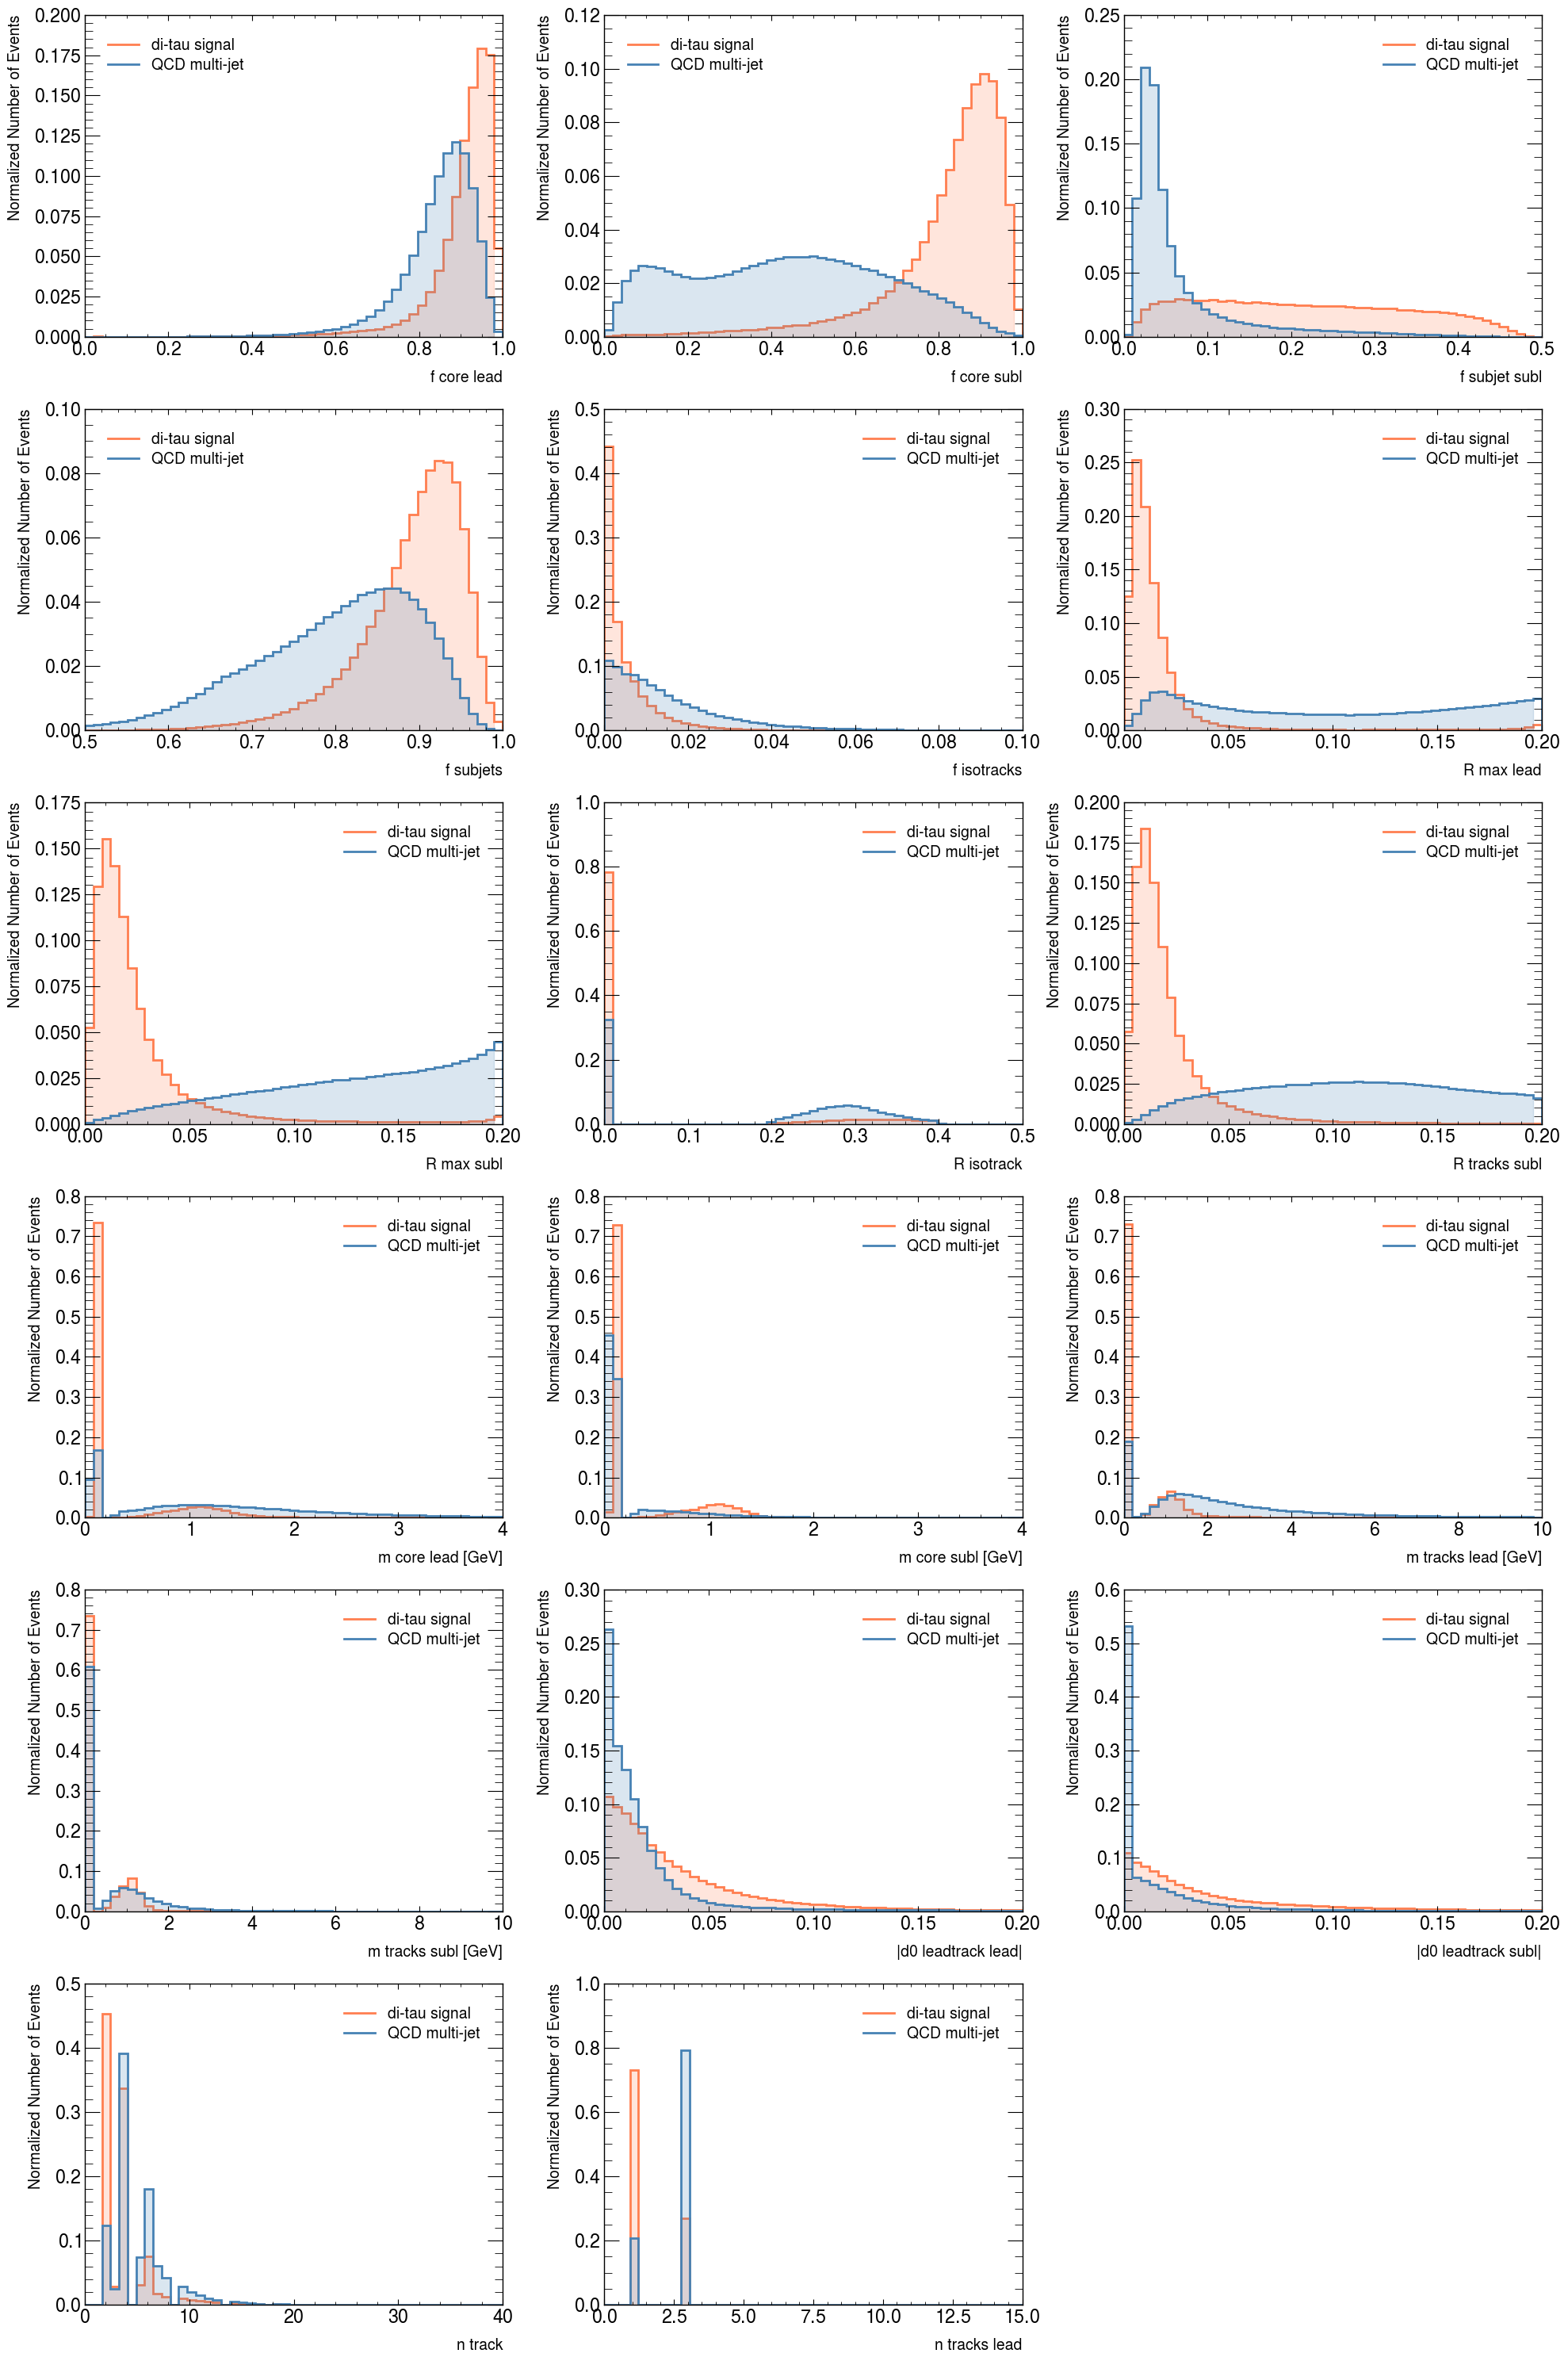

In [3]:
import mplhep as hep

# Set the style to ATLAS
plt.style.use(hep.style.ATLAS)

# Define the variables to plot with their specific ranges
training_vars = {
    "f_core_lead": (0, 1, "f core lead"),
    "f_core_subl": (0, 1, "f core subl"),
    "f_subjet_subl": (0, 0.5, "f subjet subl"),
    "f_subjets": (0.5, 1, "f subjets"),
    "f_isotracks": (0, 0.1, "f isotracks"),
    "R_max_lead": (0, 0.2, "R max lead"),
    "R_max_subl": (0, 0.2, "R max subl"),
    "R_isotrack": (0, 0.5, "R isotrack"),  # log scale
    "R_tracks_subl": (0, 0.2, "R tracks subl"),
    "m_core_lead": (0, 4, "m core lead [GeV]"),
    "m_core_subl": (0, 4, "m core subl [GeV]"),
    "m_tracks_lead": (0, 10, "m tracks lead [GeV]"),
    "m_tracks_subl": (0, 10, "m tracks subl [GeV]"),
    "d0_leadtrack_lead": (0, 0.2, "|d0 leadtrack lead|"),
    "d0_leadtrack_subl": (0, 0.2, "|d0 leadtrack subl|"),
    "n_track": (0, 40, "n track"),
    "n_tracks_lead": (0, 15, "n tracks lead")
}

# Create a figure with subplots
n_cols = 3
n_rows = (len(training_vars) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, (var, range_info) in enumerate(training_vars.items()):
    if var in df.columns:
        ax = axs[i]
        
        # Prepare data
        if var.startswith('d0_leadtrack'):
            data = df[var].abs()
        elif var.startswith('m_'):
            data = df[var] / 1000  # Convert to GeV
        else:
            data = df[var]
        
        # Set up bins based on the range info

        bins = np.linspace(range_info[0], range_info[1], 50)
        
        # Calculate histogram data
        hist_signal, _ = np.histogram(data[df['label']==1], bins=bins)
        hist_background, _ = np.histogram(data[df['label']==0], bins=bins)
        
        # Normalize histograms
        hist_signal = hist_signal / hist_signal.sum()
        hist_background = hist_background / hist_background.sum()
        
        # Plot histograms
        hep.histplot(hist_signal, bins, ax=ax, label='di-tau signal', histtype='step', edgecolor='coral', linewidth=2)
        ax.fill_between(bins[:-1], hist_signal, step='post', alpha=0.2, color='coral')
        hep.histplot(hist_background, bins, ax=ax, label='QCD multi-jet', histtype='step', edgecolor='steelblue', linewidth=2)
        ax.fill_between(bins[:-1], hist_background, step='post', alpha=0.2, color='steelblue')
        
        # Customize the plot
        ax.set_xlabel(range_info[2], fontsize=14)
        ax.set_ylabel('Normalized Number of Events', fontsize=14)
        
        # Add a legend to each subplot
        ax.legend(fontsize=14)

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.show()

In [ ]:
import mplhep as hep
import os

# Set the style to ATLAS
plt.style.use(hep.style.ATLAS)

# Define the variables to plot with their specific ranges
training_vars = {
    "f_core_lead": (0, 1, "f core lead"),
    "f_core_subl": (0, 1, "f core subl"),
    "f_subjet_subl": (0, 0.5, "f subjet subl"),
    "f_subjets": (0.5, 1, "f subjets"),
    "f_isotracks": (0, 0.1, "f isotracks"),
    "R_max_lead": (0, 0.2, "R max lead"),
    "R_max_subl": (0, 0.2, "R max subl"),
    "R_isotrack": (0, 0.5, "R isotrack"),
    "R_tracks_subl": (0, 0.2, "R tracks subl"),
    "m_core_lead": (0, 4, "m core lead [GeV]"),
    "m_core_subl": (0, 4, "m core subl [GeV]"),
    "m_tracks_lead": (0, 10, "m tracks lead [GeV]"),
    "m_tracks_subl": (0, 10, "m tracks subl [GeV]"),
    "d0_leadtrack_lead": (0, 0.2, "|d0 leadtrack lead|"),
    "d0_leadtrack_subl": (0, 0.2, "|d0 leadtrack subl|"),
    "n_track": (0, 40, "n track"),
    "n_tracks_lead": (0, 15, "n tracks lead")
}

# Create output directory if it doesn't exist
output_dir = "training_var_plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for var, range_info in training_vars.items():
    if var in df.columns:
        # Create a new figure for each variable
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Prepare data
        if var.startswith('d0_leadtrack'):
            data = df[var].abs()
        elif var.startswith('m_'):
            data = df[var] / 1000  # Convert to GeV
        else:
            data = df[var]
        
        # Set up bins based on the range info
        bins = np.linspace(range_info[0], range_info[1], 50)
        
        # Calculate histogram data
        hist_signal, _ = np.histogram(data[df['label']==1], bins=bins)
        hist_background, _ = np.histogram(data[df['label']==0], bins=bins)
        
        # Normalize histograms
        hist_signal = hist_signal / hist_signal.sum()
        hist_background = hist_background / hist_background.sum()
        
        # Plot histograms
        hep.histplot(hist_signal, bins, ax=ax, label='di-tau signal', histtype='step', edgecolor='coral', linewidth=2)
        ax.fill_between(bins[:-1], hist_signal, step='post', alpha=0.2, color='coral')
        hep.histplot(hist_background, bins, ax=ax, label='QCD multi-jet', histtype='step', edgecolor='steelblue', linewidth=2)
        ax.fill_between(bins[:-1], hist_background, step='post', alpha=0.2, color='steelblue')
        
        # Customize the plot
        ax.set_xlabel(range_info[2], fontsize=16)
        ax.set_ylabel('Normalized Number of Events', fontsize=16)
        
        # Add a legend to each subplot
        ax.legend(fontsize=16)

        # Adjust the layout
        plt.tight_layout()

        # Save the figure
        plt.savefig(os.path.join(output_dir, f"{var}_distribution.png"), dpi=300,)
        plt.close(fig)  # Close the figure to free up memory

print(f"All plots have been saved in the '{output_dir}' directory.")

All plots have been saved in the 'training_var_plots' directory.


In [3]:
#the order matters. needs to be kept like this. 
training_vars = ["f_core_lead",
                "f_core_subl",
                "f_subjet_subl",
                "f_subjets",
                "f_isotracks",
                "R_max_lead",
                "R_max_subl",
                "R_isotrack",
                "R_tracks_subl",
                "m_core_lead",
                "m_core_subl",
                "m_tracks_lead",
                "m_tracks_subl",
                "d0_leadtrack_lead",
                "d0_leadtrack_subl",
                "n_track",
                "n_tracks_lead"]

# Scrambling 
# Calculate the modulo of each eventID
# df['eventID_mod'] = df['event_id'] % 5
df['eventID_mod'] = df['event_id'] % 10

# df['weight'] = df['event_weight'] * df['pT_weight']

log_vars = ["f_isotracks", "m_core_lead", "m_core_subl", "m_tracks_lead", "m_tracks_subl"]
abs_log_var = ["d0_leadtrack_lead", "d0_leadtrack_subl"]

# df[log_vars] = np.log(df[log_vars])
# df = df[~df[log_vars].isin([np.inf, -np.inf]).any(axis=1)]
# df[abs_log_var] = np.log(np.abs(df[abs_log_var]))
# df = df[~df[abs_log_var].isin([np.inf, -np.inf]).any(axis=1)]

df.loc[:, log_vars] = np.log(df[log_vars])
df.loc[:, abs_log_var] = np.abs(np.log(df[abs_log_var]))
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# train_df = df[df['eventID_mod'] < 4] # 80%
# test_df = df[df['eventID_mod'] == 4] # 20%
train_df = df[df['eventID_mod'] < 7] # 70%
test_df = df[df['eventID_mod'] >= 7] # 30%

train_df = train_df.drop(columns='eventID_mod')
test_df = test_df.drop(columns='eventID_mod')

# Training & Testing sets
training_data, testing_data, training_labels, testing_labels, training_weights, testing_weights = \
train_df[training_vars], test_df[training_vars], train_df['label'], test_df['label'], train_df['weight'], test_df['weight']

#Change column names to integers if needed (for ML models that expect numerical feature names)
feature_mapping = {feature: i for i, feature in enumerate(training_data.columns)}
training_data.rename(columns=feature_mapping, inplace=True)
feature_mapping = {feature: i for i, feature in enumerate(testing_data.columns)}
testing_data.rename(columns=feature_mapping, inplace=True)

# print(training_data)
print("training data: ", training_data.shape)
print("training labels: ", training_labels.shape)
print("training weights: ", training_weights.shape)
print("testing data: ", testing_data.shape)
print("testing labels: ", testing_labels.shape)
print("testing weights: ", testing_weights.shape)
print("testing ratio: ", testing_weights.shape[0]/(testing_weights.shape[0]+training_data.shape[0]))

/global/homes/a/agarabag/.conda/envs/ditau/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/global/homes/a/agarabag/.conda/envs/ditau/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/global/homes/a/agarabag/.conda/envs/ditau/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


training data:  (4192560, 17)
training labels:  (4192560,)
training weights:  (4192560,)
testing data:  (1796672, 17)
testing labels:  (1796672,)
testing weights:  (1796672,)
testing ratio:  0.29998370408760255


/tmp/ipykernel_344206/393139876.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.rename(columns=feature_mapping, inplace=True)
/tmp/ipykernel_344206/393139876.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.rename(columns=feature_mapping, inplace=True)


In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# training_data = scaler.fit_transform(training_data) #calculate and apply the transformation to training dataset
# testing_data = scaler.transform(testing_data) # apply to test dataset the transformation calculated the line above

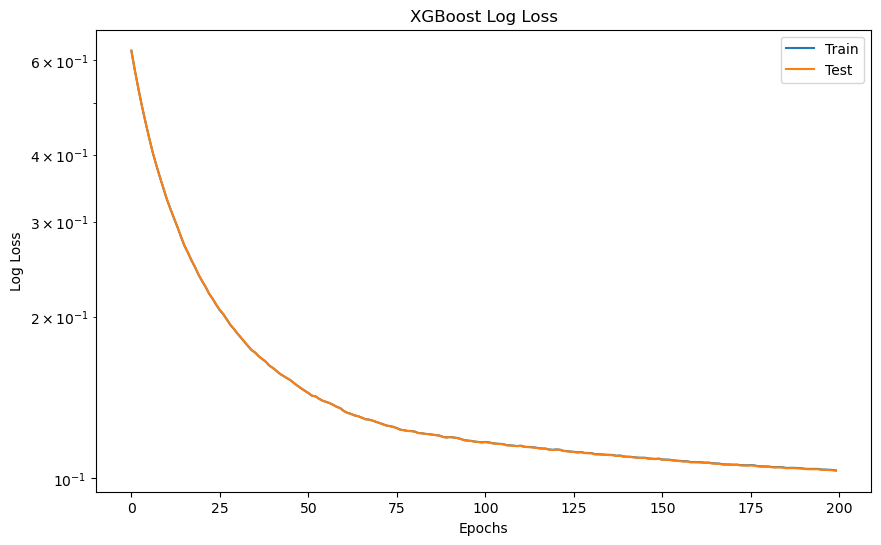

In [23]:
# Define BDT parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 200,
    'eval_metric': 'logloss',
    'random_state': 0,
    'gamma': 0.001,
    'verbosity': 0  # Set to 0 to suppress training output
}

# Create and train the BDT
bdt = XGBClassifier(**params)
eval_set = [(training_data, training_labels), (testing_data, testing_labels)]
bdt.fit(training_data, training_labels, eval_set=eval_set, sample_weight=training_weights, verbose=False)

# Retrieve evaluation results
results = bdt.evals_result()

# Plot training and testing loss
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train', lw=3)
ax.plot(x_axis, results['validation_1']['logloss'], label='Test', linestyle='dotted', lw=4)
ax.legend(fontsize=16)
plt.ylabel('Log Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.title('XGBoost Log Loss')
#log y axis 
plt.yscale('log')

plt.show()

In [6]:
# create the BDT
params = {
'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200,
'eval_metric': 'logloss',
'random_state': 0,
'gamma': 0.001,
'verbosity': 2
}
bdt = XGBClassifier(**params)

# Train the classifier
bdt.fit(training_data, training_labels, eval_set=[(testing_data, testing_labels)], sample_weight=training_weights)

[0]	validation_0-logloss:0.62555
[1]	validation_0-logloss:0.57462
[2]	validation_0-logloss:0.53085
[3]	validation_0-logloss:0.49293
[4]	validation_0-logloss:0.46053
[5]	validation_0-logloss:0.43146
[6]	validation_0-logloss:0.40520
[7]	validation_0-logloss:0.38412
[8]	validation_0-logloss:0.36504
[9]	validation_0-logloss:0.34761
[10]	validation_0-logloss:0.33145
[11]	validation_0-logloss:0.31797
[12]	validation_0-logloss:0.30560
[13]	validation_0-logloss:0.29412
[14]	validation_0-logloss:0.28211
[15]	validation_0-logloss:0.27125
[16]	validation_0-logloss:0.26321
[17]	validation_0-logloss:0.25452
[18]	validation_0-logloss:0.24731
[19]	validation_0-logloss:0.23938
[20]	validation_0-logloss:0.23295
[21]	validation_0-logloss:0.22715
[22]	validation_0-logloss:0.22056
[23]	validation_0-logloss:0.21585
[24]	validation_0-logloss:0.21038
[25]	validation_0-logloss:0.20573
[26]	validation_0-logloss:0.20208
[27]	validation_0-logloss:0.19745
[28]	validation_0-logloss:0.19301
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.001, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

Epoch 1/50, Training Loss: 2.5116e-06, Validation Loss: 1.6611e-06, Training Accuracy: 9.3325e-01, Validation Accuracy: 9.4488e-01
Epoch 2/50, Training Loss: 1.7672e-06, Validation Loss: 1.4161e-06, Training Accuracy: 9.5210e-01, Validation Accuracy: 9.6286e-01
Epoch 3/50, Training Loss: 1.6764e-06, Validation Loss: 1.4708e-06, Training Accuracy: 9.5407e-01, Validation Accuracy: 9.5147e-01
Epoch 4/50, Training Loss: 1.6231e-06, Validation Loss: 1.3506e-06, Training Accuracy: 9.5665e-01, Validation Accuracy: 9.6046e-01
Epoch 5/50, Training Loss: 1.5583e-06, Validation Loss: 1.3886e-06, Training Accuracy: 9.5763e-01, Validation Accuracy: 9.5472e-01
Epoch 6/50, Training Loss: 1.6153e-06, Validation Loss: 1.4016e-06, Training Accuracy: 9.5684e-01, Validation Accuracy: 9.5931e-01
Epoch 7/50, Training Loss: 1.8228e-06, Validation Loss: 1.3533e-06, Training Accuracy: 9.5434e-01, Validation Accuracy: 9.6562e-01
Epoch 8/50, Training Loss: 1.5690e-06, Validation Loss: 1.3486e-06, Training Accura

/tmp/ipykernel_541777/147637759.py:206: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1/fpr, color='black', lw=1, label='ROC curve (area = %0.5f)' % roc_auc)


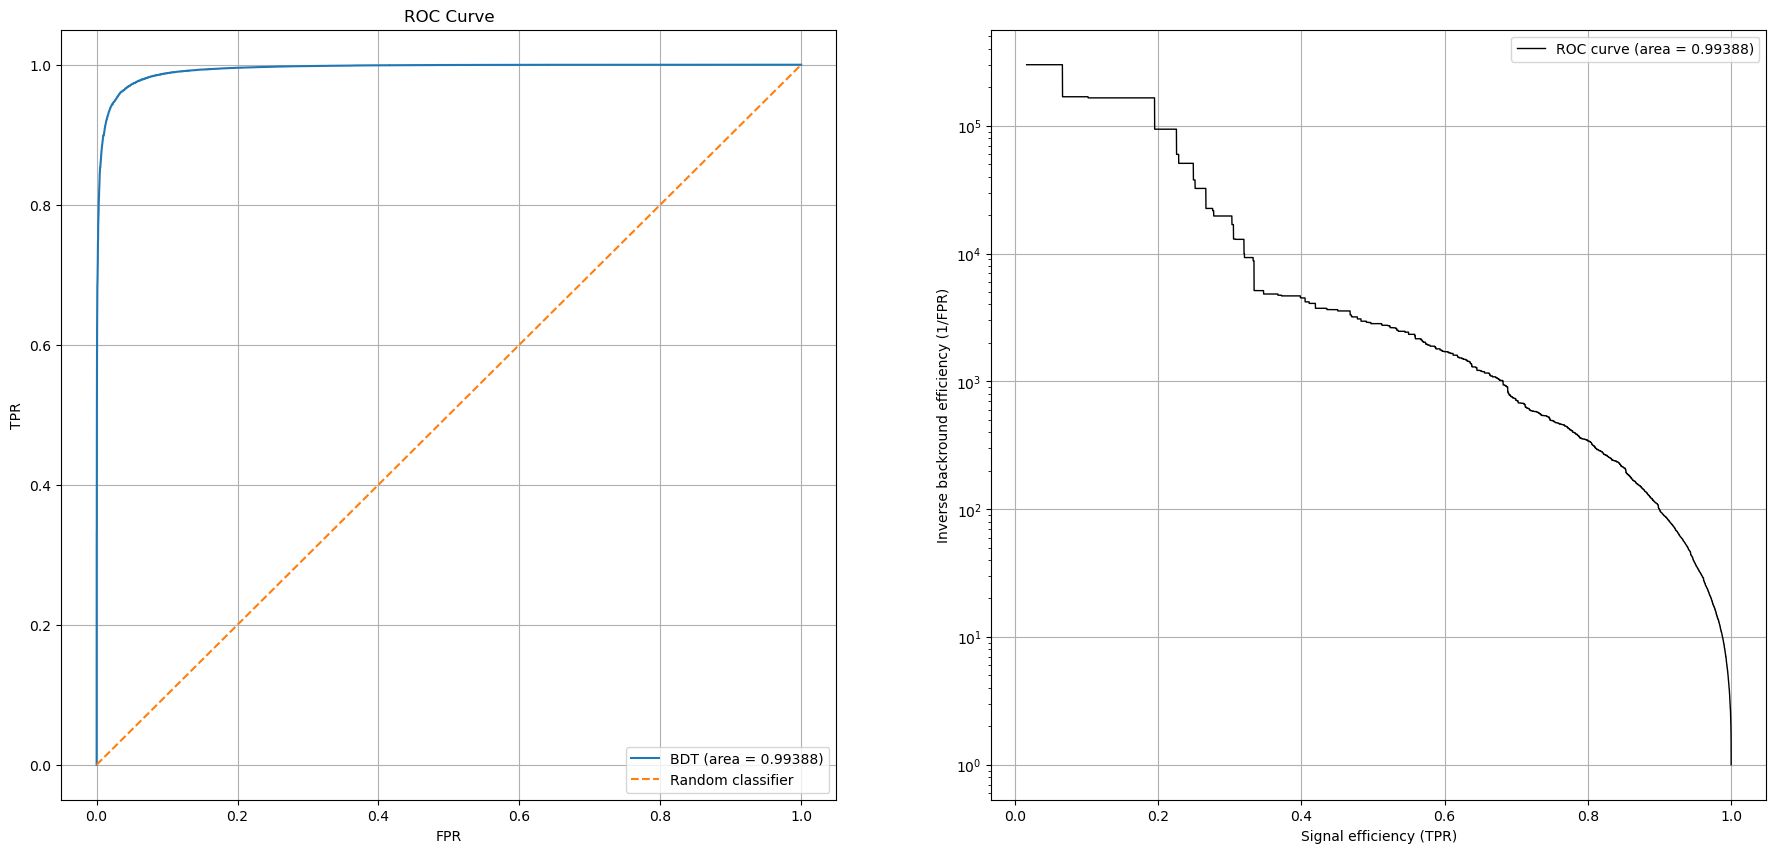

Pytorch Time: 57.61362920602163 min


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

start = time.time()

learning_rate = 0.0005
batch_size = 512
dropout = 0
neuron1 = 256
neuron2 = 1024
neuron3 = 512
neuron4 = 128
neuron5 = 32

# features = df[training_vars].values
# labels = df['label'].values
# weights = df['weight'].values

# # Split the dataset into training and validation sets
# X_train, X_val, y_train, y_val, weights_train, weights_val = train_test_split(
#     features, labels, weights, test_size=0.2, random_state=42)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Split the dataset into training and validation sets
df['eventID_mod'] = df['event_id'] % 10

train_loc = df['eventID_mod'] < 7 # 70%
test_loc = df['eventID_mod'] >= 7 # 30%

features, labels, weights = df[training_vars].values, df['label'].values, df['weight'].values

X_train, X_val, y_train, y_val, weights_train, weights_val = \
      features[train_loc], features[test_loc], labels[train_loc], labels[test_loc], weights[train_loc], weights[test_loc] 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
weights_train_tensor = torch.tensor(weights_train, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)

# Define the Dataset
class SignalBackgroundDataset(Dataset):
    def __init__(self, features, labels, weights):
        self.features = features
        self.labels = labels
        self.weights = weights

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx], self.weights[idx]

# Define the DNN model with dropout
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, neuron1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)
        self.fc2 = nn.Linear(neuron1, neuron2)
        self.fc3 = nn.Linear(neuron2, neuron3)
        self.fc4 = nn.Linear(neuron3, neuron4)
        self.fc5 = nn.Linear(neuron4, neuron5)
        self.fc6 = nn.Linear(neuron5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc6(x))
        return x

model = DNN(X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss(reduction='none')
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training data
train_dataset = SignalBackgroundDataset(X_train_tensor, y_train_tensor, weights_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = SignalBackgroundDataset(X_val_tensor, y_val_tensor, torch.tensor(weights_val, dtype=torch.float32).to(device))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 50
patience = 6  # How many epochs to wait after last time validation loss improved.
best_val_loss = np.inf  # Initialize best validation loss to infinity
epochs_no_improve = 0  # Counter for epochs with no improvement

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions, total_predictions = 0, 0

    for inputs, targets, batch_weights in train_loader:
        inputs, targets, batch_weights = inputs.to(device), targets.to(device), batch_weights.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss = (loss * batch_weights).mean()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # binary classification for accuracy calculation
        preds = outputs.squeeze().round()
        correct_predictions += (preds == targets).sum().item()
        total_predictions += targets.size(0)

    train_accuracy = correct_predictions / total_predictions
    avg_training_loss = running_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_predictions, total_predictions = 0, 0

    with torch.no_grad():
        for inputs, targets, batch_weights in val_loader:
            inputs, targets, batch_weights = inputs.to(device), targets.to(device), batch_weights.to(device)

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            loss = (loss * batch_weights).mean()

            val_running_loss += loss.item()

            preds = outputs.squeeze().round()
            correct_predictions += (preds == targets).sum().item()
            total_predictions += targets.size(0)

    val_accuracy = correct_predictions / total_predictions
    avg_val_loss = val_running_loss / len(val_loader)

#     # Log metrics to W&B
#     wandb.log({
#         'epoch': epoch,
#         'training_loss': avg_training_loss,
#         'validation_loss': avg_val_loss,
#         'training_accuracy': train_accuracy,
#         'validation_accuracy': val_accuracy
#     })

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_training_loss:.4e}, Validation Loss: {avg_val_loss:.4e}, Training Accuracy: {train_accuracy:.4e}, Validation Accuracy: {val_accuracy:.4e}")

    # Check if the validation loss improved
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save the model
        # torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs.')
            break  # Early stopping


# Evaluate on the validation set
model.eval()
val_predictions = []
with torch.no_grad():
    for inputs, targets, _ in DataLoader(SignalBackgroundDataset(X_val_tensor, y_val_tensor, torch.tensor(weights_val, dtype=torch.float32)), batch_size=batch_size, shuffle=False):
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        val_predictions.extend(outputs.cpu().numpy())
val_predictions = np.array(val_predictions)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val, val_predictions, sample_weight=weights_val)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(22, 10))
plt.subplot(121)
plt.plot(fpr, tpr, label='BDT (area = {:.5f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(tpr, 1/fpr, color='black', lw=1, label='ROC curve (area = %0.5f)' % roc_auc)
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Inverse backround efficiency (1/FPR)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

print(f'Pytorch Time: {(time.time() - start)/60} min')

In [17]:
bdt_roc_data = {
    'tpr': tpr,
    'fpr': fpr
}
np.save('mlp_roc_data.npy', bdt_roc_data)


In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

# training_vars = ["f_core_lead",
#                 "f_core_subl",
#                 "f_subjet_subl",
#                 "f_subjets",
#                 # "f_isotracks",
#                 "R_max_lead",
#                 "R_max_subl",
#                 "R_isotrack",
#                 "R_tracks_subl",
#                 "m_core_lead",
#                 # "m_core_subl",
#                 "m_tracks_lead",
#                 # "m_tracks_subl",
#                 # "d0_leadtrack_lead",
#                 # "d0_leadtrack_subl",
#                 # "n_track",
#                 "n_tracks_lead"]


# # Scrambling
# # Calculate the modulo of each eventID with 5
# df['eventID_mod'] = df['event_id'] % 10

# df['weight'] = df['event_weight'] * df['pT_weight']

# log_vars = ["f_isotracks", "m_core_lead", "m_core_subl", "m_tracks_lead", "m_tracks_subl"]
# abs_log_var = ["d0_leadtrack_lead", "d0_leadtrack_subl"]

# train_df = df[df['eventID_mod'] < 7] # 70%
# test_df = df[df['eventID_mod'] >= 7] # 30%

# train_df = train_df.drop(columns='eventID_mod')
# test_df = test_df.drop(columns='eventID_mod')

# # Training & Testing sets
# training_data, testing_data, training_labels, testing_labels, training_weights, testing_weights = \
# train_df[training_vars], test_df[training_vars], train_df['label'], test_df['label'], train_df['weight'], test_df['weight']

# # Change column names to integers if needed (for ML models that expect numerical feature names)
# feature_mapping = {feature: i for i, feature in enumerate(training_data.columns)}
# training_data.rename(columns=feature_mapping, inplace=True)
# testing_data.rename(columns=feature_mapping, inplace=True)

# # Define the classifier
# bdt = XGBClassifier(random_state=0, verbosity=1)

# # Define the parameter distribution
# param_dist = {
#     'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3],
#     'max_depth': [2, 3, 4, 5, 6]
# }

# # Define the search with RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=bdt, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, verbose=2, random_state=0, n_jobs=-1)

# # Perform the search
# random_search.fit(training_data, training_labels, sample_weight=training_weights)

# # Best estimator found by RandomizedSearchCV
# best_estimator = random_search.best_estimator_

# # Predictions and final evaluation on the testing set
# predictions = best_estimator.predict(testing_data)
# accuracy = accuracy_score(testing_labels, predictions, sample_weight=testing_weights)

# # Output the results
# print("Best parameters found: ", random_search.best_params_)
# print("Testing accuracy: ", accuracy)

# # Feature Importance
# importance = best_estimator.feature_importances_
# # Re-map the feature importance scores to the original feature names
# feature_importances = {training_vars[i]: score for i, score in enumerate(importance)}

# # Predict probabilities for the testing data
# probs = best_estimator.predict_proba(testing_data)
# probs = probs[:, 1]

# fpr_w, tpr_w, thresholds_w = roc_curve(testing_labels, probs, sample_weight=testing_weights)
# auc_w = roc_auc_score(testing_labels, probs, sample_weight=testing_weights)
    
# # Plot feature importance
# plt.figure(figsize=(10, 8))
# plt.barh(range(len(feature_importances)), list(feature_importances.values()), align='center')
# plt.yticks(range(len(feature_importances)), list(feature_importances.keys()))
# plt.xlabel('Feature Importance Score')
# plt.title('Feature Importances')
# plt.show()

In [4]:
path_npy = "/global/u2/a/agarabag/pscratch/OmniLearn/scripts/tau/TAU/npy/"

filename = "PET_tau_8_local_layer_scale_token_baseline_classifier.weights_good_run1.npy"
data = np.load(path_npy+filename,allow_pickle=True).item()

filename_s = "PET_tau_8_local_layer_scale_token_baseline_classifier.weights.npy"
data_n = np.load(path_npy+filename_s,allow_pickle=True).item()

# y_true = data['y'][:, 1]  # Select the true labels for the positive class
# y_scores = data['pred'][:, 1]  # Select the predicted probabilities for the positive class
# fpr_gnn, tpr_gnn, thresholds_gnn = roc_curve(y_true, y_scores)
# auc_gnn = roc_auc_score(y_true, y_scores)

y_true_n = data_n['y'][:, 1]  # Select the true labels for the positive class
y_scores_n = data_n['pred'][:, 1]  # Select the predicted probabilities for the positive class
fpr_gnn_s, tpr_gnn_s, thresholds_gnn_s = roc_curve(y_true_n, y_scores_n)
auc_gnn_s = roc_auc_score(y_true_n, y_scores_n)

#load mlp_roc_data.npy
bdt_roc_data = np.load('mlp_roc_data.npy', allow_pickle=True).item()
fpr_mlp, tpr_mlp = bdt_roc_data['fpr'], bdt_roc_data['tpr']
auc_mlp = auc(fpr_mlp, tpr_mlp)

/tmp/ipykernel_344206/2283144450.py:42: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_mlp, 1/fpr_mlp, color='green', lw=3, label='MLP', alpha=0.5)
/tmp/ipykernel_344206/2283144450.py:44: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_gnn_s, 1/fpr_gnn_s, color='brown', lw=3, label='OmniLearn', alpha=0.5)


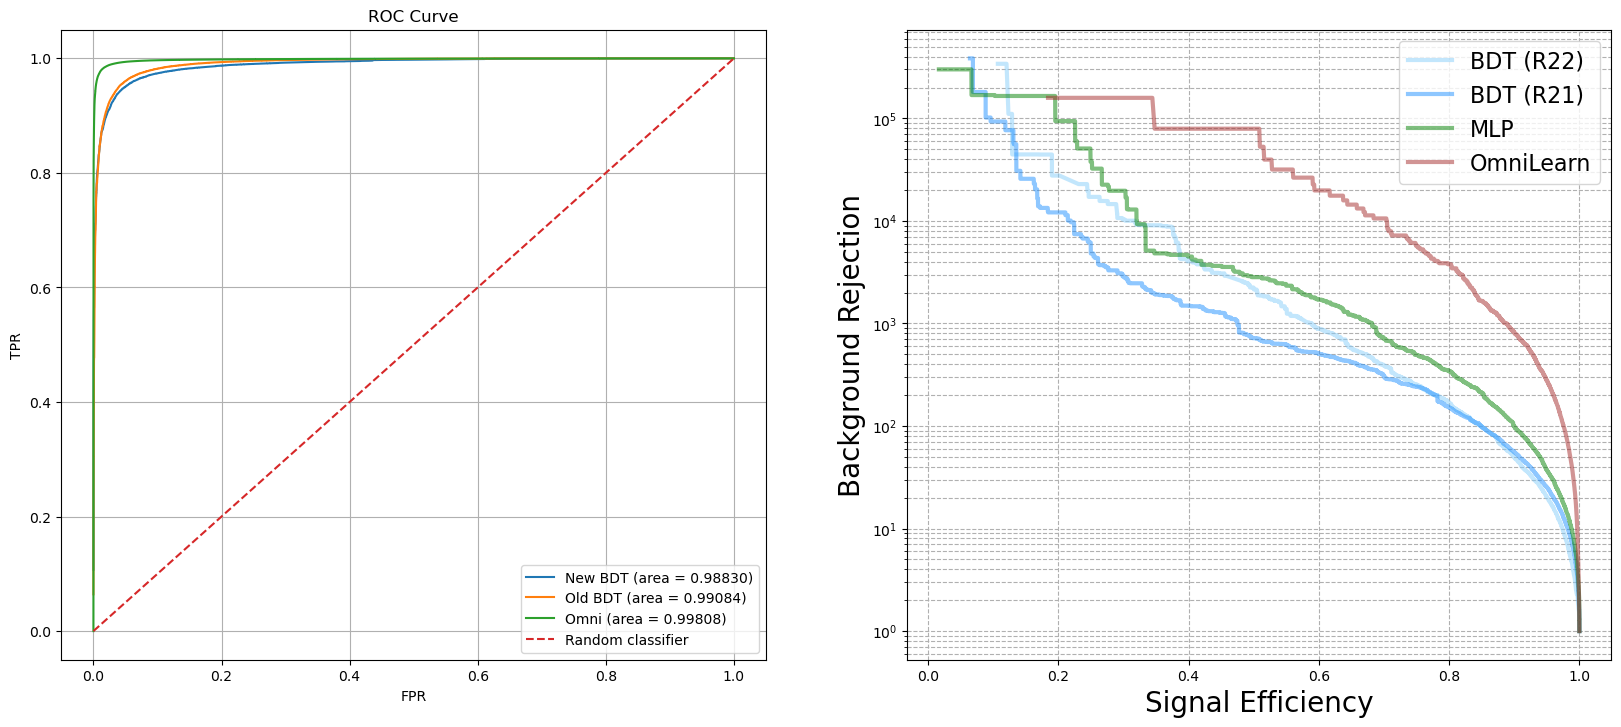

In [6]:
# Predict probabilities for the testing data
# probs = bdt.predict_proba(testing_data)
# probs = probs[:, 1]

# fpr_w, tpr_w, thresholds_w = roc_curve(testing_labels, probs, sample_weight=testing_weights)
# auc_w = roc_auc_score(testing_labels, probs, sample_weight=testing_weights)

old_bdt_score = test_df['bdt_score']
fpr_old, tpr_old, _ = roc_curve(testing_labels, old_bdt_score, sample_weight=testing_weights)
roc_auc_old = auc(fpr_old, tpr_old)

new_bdt_score = test_df['bdt_score_new']
fpr_w, tpr_w, _ = roc_curve(testing_labels, new_bdt_score, sample_weight=testing_weights)
auc_w = auc(fpr_w, tpr_w)



non_zero_indices = np.nonzero(fpr_w)
tpr_w = tpr_w[non_zero_indices]
fpr_w = fpr_w[non_zero_indices]

non_zero_indices_old = np.nonzero(fpr_old)
tpr_old = tpr_old[non_zero_indices_old]
fpr_old = fpr_old[non_zero_indices_old]

plt.figure(figsize=(20, 18))
plt.subplot(221)
plt.plot(fpr_w, tpr_w, label='New BDT (area = {:.5f})'.format(auc_w))
plt.plot(fpr_old, tpr_old, label='Old BDT (area = {:.5f})'.format(roc_auc_old))
# plt.plot(fpr_gnn, tpr_gnn, label='Omni FineTuned (area = {:.5f})'.format(auc_gnn))
plt.plot(fpr_gnn_s, tpr_gnn_s, label='Omni (area = {:.5f})'.format(auc_gnn_s))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.plot(tpr_w, 1/fpr_w, color='lightskyblue', lw=3, label='BDT (R22)', alpha=0.5)
plt.plot(tpr_old, 1/fpr_old, color='dodgerblue', lw=3, label='BDT (R21)', alpha=0.5)
plt.plot(tpr_mlp, 1/fpr_mlp, color='green', lw=3, label='MLP', alpha=0.5)
# plt.plot(tpr_gnn, 1/fpr_gnn, color='lightcoral', lw=3, label='Omni* fine-tuned', alpha=0.5)
plt.plot(tpr_gnn_s, 1/fpr_gnn_s, color='brown', lw=3, label='OmniLearn', alpha=0.5)
# plt.axhline(y=1e4, color='purple', linestyle='--', label='Background Rejection=10^4')
plt.xlabel('Signal Efficiency', fontsize=20)
plt.ylabel('Background Rejection', fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 16})
plt.grid(True, which="both", ls="--")

# plt.subplot(223)
# plt.hist(probs[testing_labels==1], bins=60, label='signal', histtype='step')
# plt.hist(probs[testing_labels==0], bins=60, label='background', histtype='step')
# plt.xlabel('BDT Score')
# plt.yscale('log')
# plt.legend()
# plt.grid(True)
# plt.show()

/tmp/ipykernel_235941/2592081922.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_mlp, tpr_mlp/np.sqrt(fpr_mlp), color='green', lw=3, label='MLP', alpha=0.5)
/tmp/ipykernel_235941/2592081922.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(tpr_mlp, tpr_mlp/np.sqrt(fpr_mlp), color='green', lw=3, label='MLP', alpha=0.5)
/tmp/ipykernel_235941/2592081922.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_gnn_s, tpr_gnn_s/np.sqrt(fpr_gnn_s), color='brown', lw=3, label='OmniLearn', alpha=0.5)
/tmp/ipykernel_235941/2592081922.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(tpr_gnn_s, tpr_gnn_s/np.sqrt(fpr_gnn_s), color='brown', lw=3, label='OmniLearn', alpha=0.5)


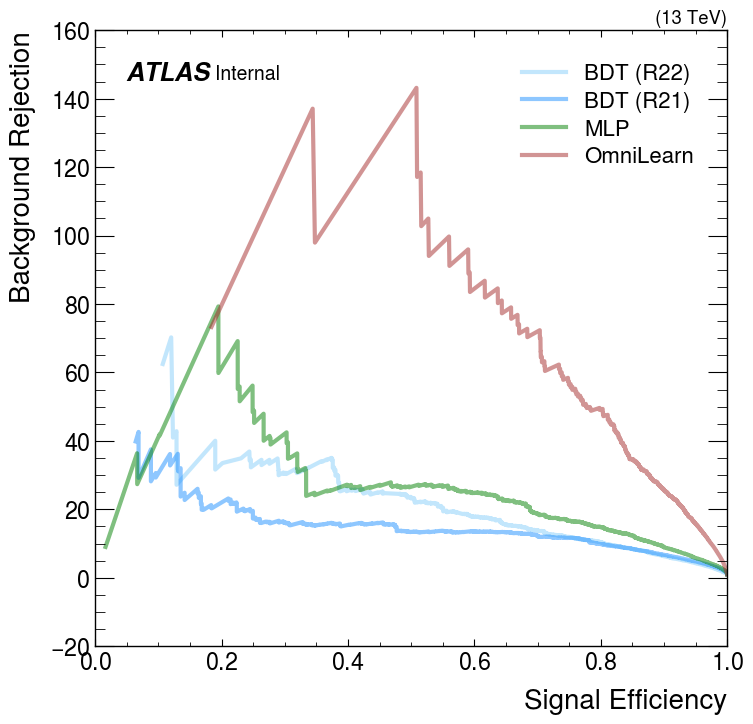

In [39]:

# Apply HEP style
hep.style.use("ATLAS")  # You can change "CMS" to any other style you prefer
# Create a square figure
plt.figure(figsize=(8, 8))
plt.plot(tpr_w, tpr_w/np.sqrt(fpr_w), color='lightskyblue', lw=3, label='BDT (R22)', alpha=0.5)
plt.plot(tpr_old, tpr_old/np.sqrt(fpr_old), color='dodgerblue', lw=3, label='BDT (R21)', alpha=0.5)
plt.plot(tpr_mlp, tpr_mlp/np.sqrt(fpr_mlp), color='green', lw=3, label='MLP', alpha=0.5)
plt.plot(tpr_gnn_s, tpr_gnn_s/np.sqrt(fpr_gnn_s), color='brown', lw=3, label='OmniLearn', alpha=0.5)
plt.xlabel('Signal Efficiency', fontsize=20)
plt.ylabel('Background Rejection', fontsize=20)
# plt.yscale('log')
# plt.ylim(top=5e6)  # Adjust the upper range of the y-axis
# plt.xlim(right=1.1)
plt.legend(loc='upper right', prop={'size': 16})
# plt.grid(True, which="both", ls="--")

# Add HEP label
hep.atlas.label("Internal", data=True, loc=1)

plt.show()

/tmp/ipykernel_344206/4250990106.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_mlp, 1/fpr_mlp, color='green', lw=3, label='MLP', alpha=0.5)
/tmp/ipykernel_344206/4250990106.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_gnn_s, 1/fpr_gnn_s, color='brown', lw=3, label='OmniLearn', alpha=0.5)


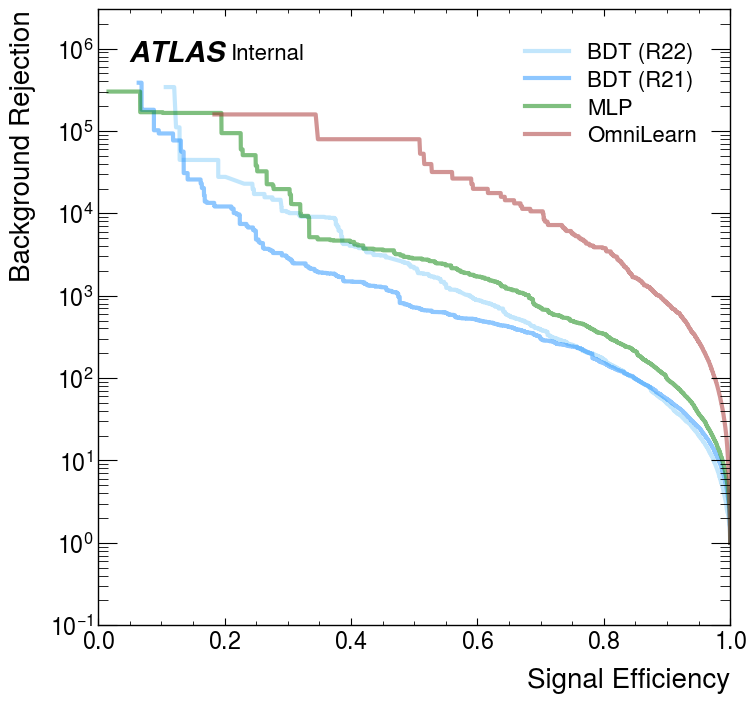

In [8]:
# Apply HEP style
hep.style.use("ATLAS")  # You can change "CMS" to any other style you prefer

# Create a square figure
plt.figure(figsize=(8, 8))

plt.plot(tpr_w, 1/fpr_w, color='lightskyblue', lw=3, label='BDT (R22)', alpha=0.5)
plt.plot(tpr_old, 1/fpr_old, color='dodgerblue', lw=3, label='BDT (R21)', alpha=0.5)
plt.plot(tpr_mlp, 1/fpr_mlp, color='green', lw=3, label='MLP', alpha=0.5)
plt.plot(tpr_gnn_s, 1/fpr_gnn_s, color='brown', lw=3, label='OmniLearn', alpha=0.5)
plt.xlabel('Signal Efficiency', fontsize=20)
plt.ylabel('Background Rejection', fontsize=20)
plt.yscale('log')
plt.ylim(top=3e6)  # Adjust the upper range of the y-axis
# plt.grid(True, which="both", ls="--")
# plt.xlim(right=1.1)
plt.legend(loc='upper right', prop={'size': 16})

# Add HEP label
hep.atlas.text("Internal", loc=1, fontsize=16)

plt.savefig("omni_roc.pdf", format='pdf', dpi=300, bbox_inches='tight')


plt.show()

TPR ~ 0.6:  [0.98636564 0.98636564 0.98636564]
FPR ~ 0.6:  [0.10259778 0.10259778 0.10259985]
TPR ~ 0.6 for new BDT:  [0.94455585 0.94455585 0.94455585]
FPR ~ 0.6 for new BDT:  [0.02593194 0.02593223 0.02593359]
TPR ~ 0.65:  [0.94635742 0.94635742 0.94635742]
FPR ~ 0.65:  [0.02820235 0.02820254 0.02820794]
TPR ~ 0.65 for new BDT:  [0.93688177 0.93688771 0.93688845]
FPR ~ 0.65 for new BDT:  [0.02188933 0.02188954 0.02188954]
TPR ~ 0.72:  [0.6854994  0.68549983 0.6855018 ]
FPR ~ 0.72:  [0.00204549 0.00204549 0.00204549]
TPR ~ 0.72 for new BDT:  [0.92445197 0.92445197 0.92445197]
FPR ~ 0.72 for new BDT:  [0.01702403 0.0170254  0.01702692]
TPR ~ 0.77:  [0.21992643 0.21992761 0.21993086]
FPR ~ 0.77:  [0.00011963 0.00011963 0.00011963]
TPR ~ 0.77 for new BDT:  [0.91347394 0.91347703 0.91347703]
FPR ~ 0.77 for new BDT:  [0.01394208 0.01394913 0.01394916]
@@@@@@@@@@@@@@@@@@
TPR ~ 0.95 for old BDT:  [0.02448068 0.02448069 0.0244807 ]
TPR ~ 0.95 for new BDT:  [0.02359292 0.02360013 0.02360069]
T

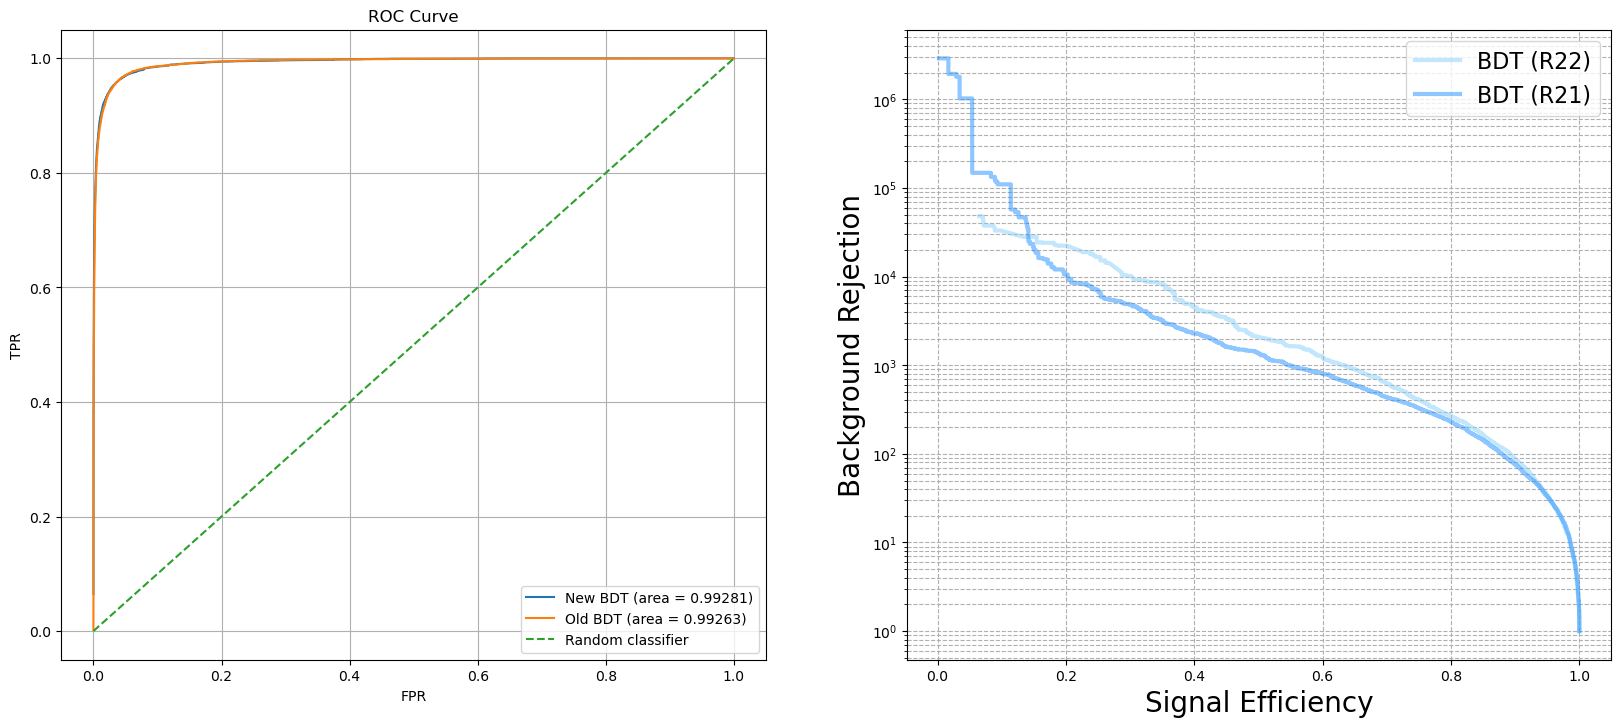

In [18]:

# Predict probabilities for the testing data
probs = bdt.predict_proba(testing_data)
probs = probs[:, 1]

fpr_w, tpr_w, thresholds_w = roc_curve(testing_labels, probs, sample_weight=testing_weights)
auc_w = roc_auc_score(testing_labels, probs, sample_weight=testing_weights)

old_bdt_score = test_df['bdt_score']
fpr_old, tpr_old, thresholds_old = roc_curve(testing_labels, old_bdt_score, sample_weight=testing_weights)
roc_auc_old = auc(fpr_old, tpr_old)

# new_bdt_score = test_df['bdt_score_new']
# fpr_w, tpr_w, _ = roc_curve(testing_labels, new_bdt_score, sample_weight=testing_weights)
# auc_w = auc(fpr_w, tpr_w)

# print tpr anf fpr for thresholds_w values > 0.6, > 0.65, >0.72, > 0.77
thresholds_w = np.array(thresholds_w)
tpr_w = np.array(tpr_w)
fpr_w = np.array(fpr_w)

thresholds_old = np.array(thresholds_old)
tpr_old = np.array(tpr_old)
fpr_old = np.array(fpr_old)
threshold_values = [0.6, 0.65, 0.72, 0.77]
# Define a tolerance for approximate matching
tolerance = 1e-2
# Iterate over the threshold values and print the corresponding TPR and FPR
for value in threshold_values:
    approx_indices = np.where(np.isclose(thresholds_old, value, atol=tolerance))[0]
    approx_indices_w = np.where(np.isclose(thresholds_w, value, atol=tolerance))[0]
    if approx_indices.size > 0:
        print(f"TPR ~ {value}: ", tpr_old[approx_indices][:3])
        print(f"FPR ~ {value}: ", fpr_old[approx_indices][:3])
        print(f"TPR ~ {value} for new BDT: ", tpr_w[approx_indices_w][:3])
        print(f"FPR ~ {value} for new BDT: ", fpr_w[approx_indices_w][:3])
    else:
        print(f"No approximate match found for threshold {value}")


print("@@@@@@@@@@@@@@@@@@")

# # Define the TPR values you want to check
tpr_values = [0.95, 0.9, 0.55, 0.2]

# Iterate over the TPR values and print the corresponding FPR
for value in tpr_values:
    approx_indices_old = np.where(np.isclose(tpr_old, value, atol=tolerance))[0]
    approx_indices_w = np.where(np.isclose(tpr_w, value, atol=tolerance))[0]
    if approx_indices_old.size > 0:
        print(f"TPR ~ {value} for old BDT: ", fpr_old[approx_indices_old][:3])
    else:
        print(f"No approximate match found for TPR {value} in old BDT")
    
    if approx_indices_w.size > 0:
        print(f"TPR ~ {value} for new BDT: ", fpr_w[approx_indices_w][:3])
    else:
        print(f"No approximate match found for TPR {value} in new BDT")




non_zero_indices = np.nonzero(fpr_w)
tpr_w = tpr_w[non_zero_indices]
fpr_w = fpr_w[non_zero_indices]

non_zero_indices_old = np.nonzero(fpr_old)
tpr_old = tpr_old[non_zero_indices_old]
fpr_old = fpr_old[non_zero_indices_old]

plt.figure(figsize=(20, 18))
plt.subplot(221)
plt.plot(fpr_w, tpr_w, label='New BDT (area = {:.5f})'.format(auc_w))
plt.plot(fpr_old, tpr_old, label='Old BDT (area = {:.5f})'.format(roc_auc_old))

plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.plot(tpr_w, 1/fpr_w, color='lightskyblue', lw=3, label='BDT (R22)', alpha=0.5)
plt.plot(tpr_old, 1/fpr_old, color='dodgerblue', lw=3, label='BDT (R21)', alpha=0.5)
# plt.axhline(y=1e4, color='purple', linestyle='--', label='Background Rejection=10^4')
plt.xlabel('Signal Efficiency', fontsize=20)
plt.ylabel('Background Rejection', fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 16})
plt.grid(True, which="both", ls="--")


In [20]:
combined_bkg['inc_new_bdt'] = np.nan
combined_bkg.loc[(combined_bkg['event_id'] % 10) >= 7, 'inc_new_bdt'] = probs[testing_labels==0]
combined_bkg['inc_new_bdt'] = combined_bkg['inc_new_bdt'].fillna(0)
combined_bkg.to_csv('/global/u2/a/agarabag/pscratch/ditdau_samples/samples_for_gnn/inc_bdt_bkg.csv', index=False)

In [13]:
len(y_scores)

1446757

In [14]:
combined_bkg['omni_score'] = y_scores[y_true==0]
combined_bkg['omni_score'] = combined_bkg['omni_score'].fillna(0)
combined_bkg.to_csv('/global/u2/a/agarabag/pscratch/ditdau_samples/samples_for_gnn/bkg_with_omni.csv', index=False)

ValueError: Length of values (318775) does not match length of index (1147050)

In [27]:
combined_bkg.columns

Index(['event_id', 'ditau_pt', 'IsTruthHadronic', 'f_core_lead', 'f_core_subl',
       'f_subjet_subl', 'f_subjets', 'f_isotracks', 'R_max_lead', 'R_max_subl',
       'R_isotrack', 'R_tracks_subl', 'm_core_lead', 'm_core_subl',
       'm_tracks_lead', 'm_tracks_subl', 'd0_leadtrack_lead',
       'd0_leadtrack_subl', 'n_track', 'n_tracks_lead', 'n_tracks_subl',
       'n_subjets', 'event_weight', 'bdt_score', 'bdt_score_new', 'average_mu',
       'eta', 'lead_subjet_pt', 'sublead_subjet_pt', 'pT_weight', 'label',
       'weight', 'inc_new_bdt'],
      dtype='object')

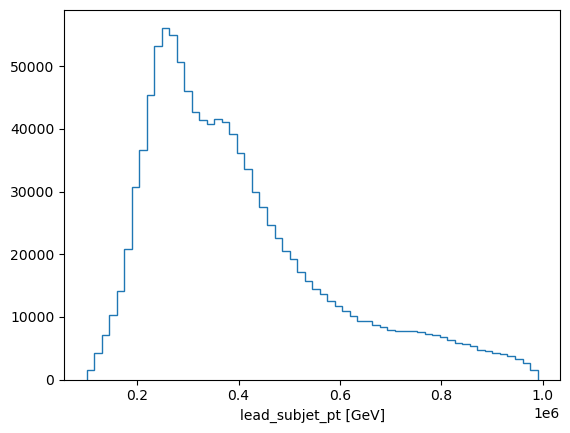

In [25]:
#plot sublead_subjet_pt
plt.hist(combined_bkg['lead_subjet_pt'], bins=60, histtype='step', label='background')
#xaix title 
plt.xlabel('lead_subjet_pt [GeV]')
plt.show()

In [13]:
combined_signal['inc_new_bdt'] = np.nan
combined_signal.loc[(combined_signal['event_id'] % 10) >= 7, 'inc_new_bdt'] = probs[testing_labels==1]
combined_signal['inc_new_bdt'] = combined_signal['inc_new_bdt'].fillna(0)
combined_signal.to_csv('/global/u2/a/agarabag/pscratch/ditdau_samples/samples_for_gnn/inc_bdt_vhtautau.csv', index=False)

In [9]:
len(combined_signal[(combined_signal['event_id'] % 10) >= 7])

87871

In [10]:
len(probs[testing_labels==1])

87871

In [12]:
bdt.save_model('bdt_results/xgb_model.json')

In [14]:
bdt.save_model('bdt_results/xgb_model.model')

/global/homes/a/agarabag/.conda/envs/ditau/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:15:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705650052425/work/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
